This code was used in order to perform the cleaning manually. It was later adapted locally for other logos.

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
### BEFORE RUNNING PLEASE UNCOMMENT YOUR NAME
#base = "Angelo/
#base = "./Felix/"
#base = "./INSERTOTHERNAME/"


In [51]:
annot = pd.read_csv("final_annot.csv")
df = pd.read_csv("annot_ok_check.csv")
df.head()

,photo_filename,width,height,class,xmin,ymin,xmax,ymax,ok_check
0,charlotte_1019088214340003257_20150630.jpg,640,640,Nike,339,394,381,439,1.0
1,charlotte_1056018576661922536_20150820.jpg,640,640,Nike,497,0,574,30,NaN
2,charlotte_1057610050380125945_20150823.jpg,1080,1080,Nike,353,406,473,477,1.0
3,charlotte_1061715143228072770_20150828.jpg,1080,1349,Nike,13,51,330,198,1.0
4,charlotte_1081463278280976819_20150925.jpg,612,612,Nike,485,30,580,69,1.0


In [52]:
logos = ["Nike","Puma","UnderArmour","TheNorthFace","Adidas","Intimissimi","NFL","AppleInc","RalphLaurenCorporation"]
df = df[df["class"].str.contains("|".join(logos))]
np.unique(df["class"])

array(['Adidas', 'AppleInc', 'Intimissimi', 'NFL', 'Nike', 'Puma',
       'RalphLaurenCorporation', 'TheNorthFace', 'UnderArmour'],
      dtype=object)

In [53]:
infolder = pd.DataFrame(os.listdir(base), columns = ["photo_filename"])
infolder = infolder[infolder["photo_filename"].str.endswith(".jpg")]
infolder["photo_filename"] = [col[0] + ".jpg" for col in infolder["photo_filename"].str.split("_jpg.rf.")]
infolder = np.array(infolder["photo_filename"])
infolder = np.unique(infolder)
infolder = list(infolder)

In [54]:
nan = list(df['photo_filename'][df['ok_check'].isna()])

In [55]:
res = []
for i in infolder:
    for j in nan:
        if i == j:
            res.append(i)
res = np.array(res)

In [56]:
print(res)

['charlotte_1466342913490386309_20170309.jpg'
 'chicago_1472287420379954140_20170317.jpg']


TheNorthFace


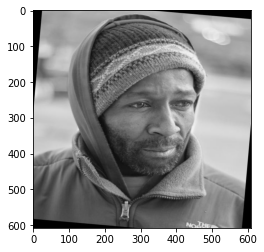

Can you see TheNorthFace?y
the file was kept
Nike


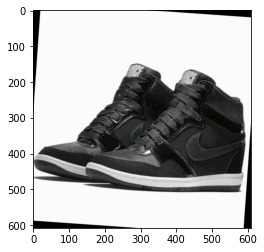

Can you see Nike?break


In [57]:
a = 0

while a != "break" and df["ok_check"].isna().any():    
    #nan = np.array(df['photo_filename'][df['ok_check'].isna()])
    #res = np.intersect1d(nan, infolder)
    choice_  = np.random.choice(res)
    df_rand = df[df['photo_filename']==choice_].reset_index(drop = True)
    choice = df_rand.photo_filename[0].replace(".jpg","")
    

    cl = df_rand["class"][0]
    
    prefixed_tot = [base + filename for filename in os.listdir(base) if filename.startswith(choice)]

    prefixed_tot_jpg = [prefixed for prefixed in prefixed_tot if prefixed[-4:] == ".jpg"]

    if len(prefixed_tot_jpg) > 0:
        path_img = prefixed_tot_jpg[0]

        plt.imshow(mpimg.imread(path_img))
        print(cl)
        plt.show()
        a = input("Can you see " + cl + "?")
        while a != "n" and a != "y" and a != "break":
            a = input("Can you see " + cl + "?")
        if a == "n":
            for file_name in prefixed_tot:
                os.remove(file_name)
            print("the file was removed") 
            df["ok_check"][df["photo_filename"] == choice + ".jpg"] = 0
            res = np.delete(res,np.argwhere(res == choice_))
        elif a == "y":
            print("the file was kept")
            df["ok_check"][df["photo_filename"] == choice + ".jpg"] = 1
            res = np.delete(res,np.argwhere(res == choice_))
        elif a == "break":
            break

new = annot.merge(df[["photo_filename","ok_check"]], on = "photo_filename", how = "left")
new.to_csv("annot_ok_check.csv", index = False)        

        
#df.to_csv("./images_checked.csv")    
